<a href="https://colab.research.google.com/github/wav0lav/lspower-24-25/blob/main/MLClinic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import random
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import dates as d
import datetime
from datetime import date, timedelta
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.lines as mlines
import re
import seaborn as sns
from sklearn.cluster import KMeans
#$pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score

Traceback (most recent call last):
  File "c:\Users\squis\.vscode\extensions\ms-python.python-2024.20.0-win32-x64\python_files\python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
  File "<string>", line 17, in <module>
ModuleNotFoundError: No module named 'kneed'



Mount the Drive

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# Cleaning and Aggregating Daily Data



# RUN THIS BEFORE EVERY PROGRAM

getting data sets

In [ ]:
random_state_val = 42

In [ ]:
daily_averages_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedDailyAverages.csv')
individual_data_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualData.csv', low_memory=False)
merged_df = pd.read_csv('/content/gdrive/Shareddrives/LSPowerData/aggregatedIndividualAndDailyUpdated.csv', low_memory=False)

In [ ]:

merged_df

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
0,568,7580,2022-12-26 07:02:50,57.3,39.9,0.3,2.5,55.4,85.8,-6.3,-5.8,NaN,74.9,NaN,TCLC-412,2022-12-26,Yellow
1,569,7581,2022-12-28 11:18:09,57.8,41.0,0.2,1.1,69.5,89.9,-10.2,-14.0,NaN,74.9,NaN,TCLC-412,2022-12-28,Yellow
2,570,7582,2022-12-28 14:23:31,58.0,41.1,0.1,0.8,67.9,89.4,-9.7,-14.2,NaN,73.7,NaN,TCLC-412,2022-12-28,Yellow
3,571,7583,2022-12-28 17:32:20,58.0,41.2,0.0,0.8,69.4,88.8,-10.0,-14.3,NaN,74.5,NaN,TCLC-412,2022-12-28,Yellow
4,572,7584,2022-12-28 20:48:17,55.0,39.2,0.3,5.4,70.0,88.5,-10.5,-13.4,NaN,75.3,NaN,TCLC-412,2022-12-28,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744033,1186320,1193332,2024-08-31 20:49:19,52.1,43.4,0.0,4.6,NaN,75.9,-4.2,-14.2,NaN,19.1,12.7,TCGW-001,2024-08-31,Green
744034,1186321,1193333,2024-08-31 21:09:58,NaN,NaN,NaN,NaN,NaN,76.0,-4.6,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744035,1186322,1193334,2024-08-31 22:06:49,NaN,NaN,NaN,NaN,NaN,76.7,-5.0,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744036,1186323,1193335,2024-08-31 23:03:48,NaN,NaN,NaN,NaN,NaN,75.4,-5.0,-14.1,NaN,18.0,NaN,TCGW-001,2024-08-31,Green


**Drop any rows with NAN**

In [ ]:
merged_df

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
0,568,7580,2022-12-26 07:02:50,57.3,39.9,0.3,2.5,55.4,85.8,-6.3,-5.8,NaN,74.9,NaN,TCLC-412,2022-12-26,Yellow
1,569,7581,2022-12-28 11:18:09,57.8,41.0,0.2,1.1,69.5,89.9,-10.2,-14.0,NaN,74.9,NaN,TCLC-412,2022-12-28,Yellow
2,570,7582,2022-12-28 14:23:31,58.0,41.1,0.1,0.8,67.9,89.4,-9.7,-14.2,NaN,73.7,NaN,TCLC-412,2022-12-28,Yellow
3,571,7583,2022-12-28 17:32:20,58.0,41.2,0.0,0.8,69.4,88.8,-10.0,-14.3,NaN,74.5,NaN,TCLC-412,2022-12-28,Yellow
4,572,7584,2022-12-28 20:48:17,55.0,39.2,0.3,5.4,70.0,88.5,-10.5,-13.4,NaN,75.3,NaN,TCLC-412,2022-12-28,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744033,1186320,1193332,2024-08-31 20:49:19,52.1,43.4,0.0,4.6,NaN,75.9,-4.2,-14.2,NaN,19.1,12.7,TCGW-001,2024-08-31,Green
744034,1186321,1193333,2024-08-31 21:09:58,NaN,NaN,NaN,NaN,NaN,76.0,-4.6,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744035,1186322,1193334,2024-08-31 22:06:49,NaN,NaN,NaN,NaN,NaN,76.7,-5.0,-14.3,NaN,18.0,NaN,TCGW-001,2024-08-31,Green
744036,1186323,1193335,2024-08-31 23:03:48,NaN,NaN,NaN,NaN,NaN,75.4,-5.0,-14.1,NaN,18.0,NaN,TCGW-001,2024-08-31,Green


In [ ]:
merged_df_wo_nan = merged_df.copy()
# merged_df_temp = merged_df_temp[~merged_df_temp['CH4 (%)'] == np.nan]
merged_df_wo_nan


nan_indices_gas = merged_df[merged_df[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)']].isna().any(axis=1)].index
nan_indices_select = merged_df[merged_df[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', 'LFG Flow (SCFM)', 'LFG Temperature (F)', 'Applied Vacuum - PA (in. H2O)', 'Available Vacuum - PB (in. H2O)', 'Liquid Column (feet)']].isna().any(axis=1)].index


# this is gets rid of any nan gas values
merged_gas =  merged_df.copy()
merged_gas = merged_gas.drop(nan_indices_gas)

# this is gets rid of any nan values for CH4, CO2, O2, Bal. Gas, PA, PB, Liquid Column
merged_select =  merged_df.copy()
merged_select = merged_select.drop(nan_indices_select)

Shuffling rows

In [ ]:
# Shuffling Rows for ML
merged_gas = merged_gas.sample(frac=1)
merged_select = merged_select.sample(frac=1)

In [ ]:
merged_gas

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
172760,189442,196454,2024-08-18 13:02:39,55.2,43.5,0.0,1.2,11.2,98.1,-24.5,-23.9,NaN,100.0,NaN,TCLC-26,2024-08-18,Green
148597,69204,76216,2023-01-03 11:16:29,58.2,39.0,0.5,2.3,7.4,63.2,-5.3,-12.3,NaN,25.9,NaN,TCLC-405,2023-01-03,Green
558694,856290,863302,2024-03-13 20:24:41,55.7,42.5,0.0,1.8,NaN,71.2,-8.2,-6.8,NaN,100.0,14.6,TCGW-027,2024-03-13,Green
627708,979067,986079,2024-05-12 17:13:46,54.8,42.2,0.0,2.9,6.2,109.0,-3.8,-41.7,NaN,13.7,NaN,TCGW-015,2024-05-12,Green
631547,982941,989953,2024-08-29 04:30:54,53.0,42.0,0.0,5.0,4.8,110.3,-6.6,-31.4,NaN,19.5,NaN,TCGW-015,2024-08-29,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447413,667874,674886,2024-04-09 03:07:28,54.3,42.4,0.0,3.3,32.4,139.1,-8.2,-25.4,NaN,45.1,23.5,TCGW-043,2024-04-09,Green
191911,264320,271332,2024-08-29 04:54:07,55.9,40.6,0.0,3.4,7.4,74.4,-20.7,-21.3,NaN,67.8,NaN,TCLC-04,2024-08-29,Green
173908,191678,198690,2023-05-12 16:54:51,58.0,40.5,0.0,1.5,13.8,76.6,-7.3,-9.2,NaN,34.5,NaN,TCLC-27,2023-05-12,Green
703412,1120639,1127651,2024-07-16 20:22:21,54.9,42.3,0.0,2.7,4.7,93.6,-26.3,-28.1,NaN,47.1,11.5,TCGW-007,2024-07-16,Green


In [ ]:
merged_select

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
445827,666288,673300,2024-02-24 16:35:40,54.3,44.5,0.0,1.2,24.1,137.5,-5.1,-10.6,NaN,63.1,24.2,TCGW-043,2024-02-24,Green
309841,414137,421149,2024-01-07 22:50:49,54.7,42.8,0.0,2.5,7.3,55.5,-11.2,-16.4,NaN,51.0,29.8,TCGW-069,2024-01-07,Green
587128,902564,909576,2024-01-30 08:13:19,54.5,42.4,0.0,3.0,0.0,46.4,-9.9,-7.2,NaN,28.6,<17,TCGW-023,2024-01-30,Green
670067,1056853,1063865,2024-04-13 04:33:30,55.4,42.7,0.1,1.8,4.5,95.8,-1.2,-27.4,NaN,21.2,<11,TCGW-011,2024-04-13,Green
425851,632060,639072,2024-08-10 04:17:23,52.0,45.2,0.1,2.7,25.0,132.3,-26.7,-26.2,NaN,72.9,<11,TCGW-047,2024-08-10,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265791,359598,366610,2024-05-10 16:04:09,55.4,44.0,0.0,0.6,9.9,96.0,-2.4,-19.4,NaN,21.7,<12,TCGW-109,2024-05-10,Green
611087,946963,953975,2024-06-16 04:35:07,53.5,43.4,0.1,3.0,20.5,95.9,-9.9,-21.9,NaN,41.2,<10,TCGW-021,2024-06-16,Green
250101,341765,348777,2024-05-20 01:54:22,55.2,43.1,0.1,1.6,21.6,111.2,-3.8,-20.0,NaN,28.2,<11,TCGW-112,2024-05-20,Green
727841,1164427,1171439,2024-01-02 19:43:49,54.5,43.4,0.2,1.9,8.5,68.2,-7.5,-5.5,NaN,74.5,<11,TCGW-002,2024-01-02,Green


functions for processing

In [ ]:
# THIS BLOCK HAS ALL THE FUNCTIONS FOR DATA FILTERING FOR INDIVIDUAL WELLS

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

# filters individual well data given a filename for an individual well
def data_filtering_individual(filename):
  search_path = '/content/gdrive/Shareddrives/LSPowerData/IndividualWellData'
  # Search for the file
  file_path = os.path.join(search_path, filename)
  df = pd.read_csv(file_path, header=6)

  df.replace({'NR': np.nan, 'missing': np.nan, 'F': np.nan}, inplace=True)
  df.replace({'--': np.nan}, inplace=True) #fake value can ignore and add plot limits if needed

  df.loc[:, 'CH4 (%)'] = df['CH4 (%)'].astype(float)
  df.loc[:, 'O2 (%)'] = df['O2 (%)'].astype(float)
  df.loc[:, 'LFG Temperature (F)'] = df['LFG Temperature (F)'].astype(float)
  df.loc[:, 'Bal. Gas (%)'] = df['Bal. Gas (%)'].astype(float)
  df.loc[:, 'Applied Vacuum - PA (in. H2O)'] = df['Applied Vacuum - PA (in. H2O)'].astype(float)
  df['Datetime'] = pd.to_datetime(df['Timestamp (US/Eastern)'])
  return df

  # Get Indices

# given the overall aggregated data frame + an individual well, outputs all the times the well is yellow
def find_yellow_times(df, well):
  y =  ((df[df['Follow Up Priority'] == 'Yellow'].index))
  n =  ((df[df['Well'] == well].index))
  intersect = intersection(y, n)

  # time_list is a list of days where the well has yellow readings
  time_list = []
  for i in range(len(intersect)):
    time_list.append(df.loc[intersect[i], 'day'])
  return time_list

# Find indices in individual well data of specific start and end time
def get_time_period(df, start, end):
  # Getse start + end time (!!)
  dt = df['Datetime']
  time1 = pd.to_datetime(start) #date 1
  index = np.searchsorted(dt, time1)

  # TODO: make an end variable
  time2 = pd.to_datetime(end) # date 2
  index2 = np.searchsorted(dt, time2) + 1
  return (index, index2)

# Find indices in individual well data from when well was broken
# Useful for plotting
def broken_list(df, time_list):
  dt = df['Datetime']
  broken = []
  for i in range(len(time_list)):
    time = pd.to_datetime(time_list[i]) #date 1
    broken.append(np.searchsorted(dt, time))
  return broken


def find_intersection(lists):
    """Finds the intersection of multiple lists."""

    if not lists:
        return []

    # Convert lists to sets for efficient intersection
    sets = [set(lst) for lst in lists]

    # Find the intersection using the intersection method
    result = sets[0].intersection(*sets[1:])

    return list(result)


def find_union(lists):
    """Finds the intersection of multiple lists."""

    if not lists:
        return []

    # Convert lists to sets for efficient intersection
    sets = [set(lst) for lst in lists]

    # Find the intersection using the intersection method
    result = sets[0].union(*sets[1:])

    return list(result)


def matthews_correlation(tp, tn, fp, fn):
  tp, tn, fp, fn = float(tp), float(tn), float(fp), float(fn)
  num = tp * tn - fp * fn
  denom = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
  return num/denom


# Machine Learning

# Isolation Forest


This cell is looking to see if different values for estimators + contamination optimize the well

This version is for gas!!

In [ ]:
merged_select

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
719074,1150994,1158006,2023-11-15 18:10:31,54.1,44.6,0.2,1.2,6.5,58.8,-11.8,-11.5,NaN,100.0,23.2,TCGW-003,2023-11-15,Green
684331,1092113,1099125,2024-04-12 11:02:25,52.5,42.9,0.5,4.1,14.7,68.5,-22.5,-25.3,NaN,11.2,<9,TCGW-008,2024-04-12,Green
439065,655172,662184,2024-05-08 13:17:53,55.2,42.2,0.0,2.5,15.6,128.6,-4.2,-31.7,NaN,22.0,20.6,TCGW-044,2024-05-08,Green
424784,630993,638005,2024-07-03 05:20:29,53.7,46.3,0.1,0.0,25.5,134.2,-26.9,-25.7,NaN,100.0,29.4,TCGW-047,2024-07-03,Green
452868,678372,685384,2023-12-11 03:46:52,52.8,44.8,0.1,2.3,13.5,100.5,-4.7,-8.6,NaN,38.0,14.6,TCGW-042A,2023-12-11,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593722,916441,923453,2024-02-20 06:24:32,53.2,43.1,0.0,3.7,13.0,117.5,-7.5,-5.9,NaN,57.3,<11,TCGW-022,2024-02-20,Green
242899,333826,340838,2024-07-02 08:05:16,56.4,42.0,0.0,1.7,20.4,116.8,-11.0,-19.3,NaN,36.1,<13,TCGW-113,2024-07-02,Green
39328,496148,503160,2024-03-26 15:55:49,56.4,40.8,0.0,2.8,6.5,61.2,-16.1,-16.2,NaN,14.1,<10,TCGW-061,2024-03-26,Yellow
341683,467799,474811,2023-12-14 08:32:34,54.2,43.0,0.1,2.7,8.5,82.1,-1.4,-9.7,NaN,25.1,16.1,TCGW-064,2023-12-14,Green


In [ ]:
def isolation_forest_df(df, selected_features):

  df_yellow = df[df["Follow Up Priority"] == "Yellow"]
  df_green = df[df["Follow Up Priority"] == "Green"]

  isolation_test_df = pd.DataFrame(columns=['estimator', 'contamination', 'recall', 'matthews'])
  data = df.copy()[selected_features]

  estimators = np.linspace(100, 300, 5)
  contamination = np.linspace(.07, .09, 5)

  for e in (estimators):
    for c in (contamination):

        # Create and fit the model
        # estimators are the number of small decision trees
        # contatmination is proportion of outliers
      clf = IsolationForest(n_estimators= int(e), contamination=round(c, 3), random_state=random_state_val)
      clf.fit(data)

      # Predict outliers
      predictions = clf.predict(data)
      data['prediction'] = predictions

        # Examine the outliers
      outliers = data[data['prediction'] == -1]
      non_outliers = data[data['prediction'] == 1]

      anomalies = df.loc[outliers.index, ['Timestamp (US/Eastern)', 'Well']] # yellow prediction
      not_anomalies = df.loc[non_outliers.index, ['Timestamp (US/Eastern)', 'Well']] # green prediction

      true_positive = len(pd.merge(anomalies, df_yellow, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted yellow + was yellow
      true_negative = len(pd.merge(not_anomalies, df_green, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted green and it actually was green
      false_negative = len(pd.merge(not_anomalies, df_yellow, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted green but was actually yellow
      false_positive = len(pd.merge(anomalies, df_green, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted yellow, but was actually green

      recall = true_positive / (true_positive + false_negative)
      matthews_corrcoef = matthews_correlation(true_positive, true_negative, false_negative, false_positive)
      isolation_test_df.loc[len(isolation_test_df)] = {'estimator': int(e), 'contamination': round(c, 3), 'recall': recall, 'matthews': matthews_corrcoef}

  return isolation_test_df

In [ ]:
selected_features = ['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', 'LFG Flow (SCFM)', 'LFG Temperature (F)', 'Applied Vacuum - PA (in. H2O)', 'Available Vacuum - PB (in. H2O)']
iso_for = isolation_forest_df(merged_select, selected_features)

# selected_features = ['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)']
# iso_for = isolation_forest_df(merged_gas, selected_features)

iso_for

KeyboardInterrupt: 

In [ ]:
# merged_gas_yellow = merged_gas[merged_gas["Follow Up Priority"] == "Yellow"]

# isolation_test_df = pd.DataFrame(columns=['estimator', 'contamination', 'correct', 'missed'])

# # selected_features = ['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)']
# data = merged_gas.copy()[selected_features]

# selected_features = ['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', 'LFG Flow (SCFM)', 'LFG Temperature (F)', 'Applied Vacuum - PA (in. H2O)', 'Available Vacuum - PB (in. H2O)']
# data = merged_select.copy()[selected_features]

# estimators = np.linspace(100, 500, 5)
# contamination = np.linspace(.07, .08, 2)

# for e in (estimators):
#   for c in (contamination):

#     data = merged_gas.copy()[selected_features] #Reminder df well is individual well data

#       # Create and fit the model
#       # estimators are the number of small decision trees
#       # contatmination is proportion of outliers
#     clf = IsolationForest(n_estimators= int(e), contamination=round(c, 3), random_state=random_state_val)
#     clf.fit(data)

#     # Predict outliers
#     predictions = clf.predict(data)
#     data['prediction'] = predictions

#       # Examine the outliers
#     outliers = data[data['prediction'] == -1]

#     anomalies = merged_gas.loc[outliers.index, ['Timestamp (US/Eastern)', 'Well']]
#     merged_result = pd.merge(anomalies, merged_gas, on=['Timestamp (US/Eastern)', 'Well'], how='inner')

#     correct = len(merged_result)/len(merged_gas_yellow)
#     missed = len(merged_gas_yellow)-len(merged_result)

#     isolation_test_df.loc[len(isolation_test_df)] = {'estimator': int(e), 'contamination': round(c, 3), 'correct': correct, 'missed': missed}


# K-Clustering

In [ ]:
# df_well #  "merged_gas" or "merged_select"

In [ ]:
merged_gas

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
687305,1095676,1102688,2024-07-20 10:43:02,52.6,44.3,0.6,2.5,3.9,76.8,-12.0,-19.4,NaN,10.2,<9,TCGW-008,2024-07-20,Green
391447,568627,575639,2024-05-23 12:24:59,54.2,40.4,0.7,4.8,4.4,88.8,-17.7,-28.6,NaN,18.0,<10,TCGW-051,2024-05-23,Green
51824,568688,575700,2024-05-25 08:29:14,52.5,41.1,0.6,5.7,3.2,73.6,-18.0,-25.8,NaN,18.0,<10,TCGW-051,2024-05-25,Yellow
128393,28526,35538,2024-08-13 15:13:05,54.3,40.5,0.1,5.0,NaN,91.8,-13.2,-20.0,NaN,50.2,NaN,TCLC-410,2024-08-13,Green
307357,407379,414391,2024-07-13 02:47:47,52.9,44.7,0.0,2.4,4.7,110.9,-8.4,-26.0,NaN,19.2,NaN,TCGW-071,2024-07-13,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623404,973323,980335,2024-08-30 20:19:58,53.7,43.6,0.2,2.6,2.3,85.6,-3.6,-18.3,NaN,21.6,26,TCGW-018,2024-08-30,Green
168924,173001,180013,2023-02-13 22:45:52,57.0,40.3,0.5,2.2,5.7,50.0,-16.1,-16.2,NaN,23.5,NaN,TCLC-28,2023-02-13,Green
111571,2171,9183,2023-07-14 11:02:50,53.8,41.2,1.0,4.1,54.8,94.5,-6.6,-9.5,NaN,98.4,NaN,TCLC-412,2023-07-14,Green
566425,864968,871980,2024-02-20 15:15:47,53.0,43.9,0.0,3.1,0.0,118.3,-0.3,-9.7,NaN,15.7,NaN,TCGW-028A,2024-02-20,Green


In [ ]:
merged_select

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
719074,1150994,1158006,2023-11-15 18:10:31,54.1,44.6,0.2,1.2,6.5,58.8,-11.8,-11.5,NaN,100.0,23.2,TCGW-003,2023-11-15,Green
684331,1092113,1099125,2024-04-12 11:02:25,52.5,42.9,0.5,4.1,14.7,68.5,-22.5,-25.3,NaN,11.2,<9,TCGW-008,2024-04-12,Green
439065,655172,662184,2024-05-08 13:17:53,55.2,42.2,0.0,2.5,15.6,128.6,-4.2,-31.7,NaN,22.0,20.6,TCGW-044,2024-05-08,Green
424784,630993,638005,2024-07-03 05:20:29,53.7,46.3,0.1,0.0,25.5,134.2,-26.9,-25.7,NaN,100.0,29.4,TCGW-047,2024-07-03,Green
452868,678372,685384,2023-12-11 03:46:52,52.8,44.8,0.1,2.3,13.5,100.5,-4.7,-8.6,NaN,38.0,14.6,TCGW-042A,2023-12-11,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593722,916441,923453,2024-02-20 06:24:32,53.2,43.1,0.0,3.7,13.0,117.5,-7.5,-5.9,NaN,57.3,<11,TCGW-022,2024-02-20,Green
242899,333826,340838,2024-07-02 08:05:16,56.4,42.0,0.0,1.7,20.4,116.8,-11.0,-19.3,NaN,36.1,<13,TCGW-113,2024-07-02,Green
39328,496148,503160,2024-03-26 15:55:49,56.4,40.8,0.0,2.8,6.5,61.2,-16.1,-16.2,NaN,14.1,<10,TCGW-061,2024-03-26,Yellow
341683,467799,474811,2023-12-14 08:32:34,54.2,43.0,0.1,2.7,8.5,82.1,-1.4,-9.7,NaN,25.1,16.1,TCGW-064,2023-12-14,Green


In [ ]:
# "merged_gas" or "merged_select"


df_clustering = merged_gas.iloc[:, [3, 4, 5, 6]] #CH4, CO2, O2, Balance Gas

# make all values floats
df_clustering = df_clustering.astype(float)


# # Standardize the features
# scaler = StandardScaler()
# df_clustering_standardized = scaler.fit_transform(df_clustering)

# # (Optional) View the standardized data
# print("Standardized Data (first 5 rows):")
# print(pd.DataFrame(df_clustering_standardized))


Optimal number of clusters: 3


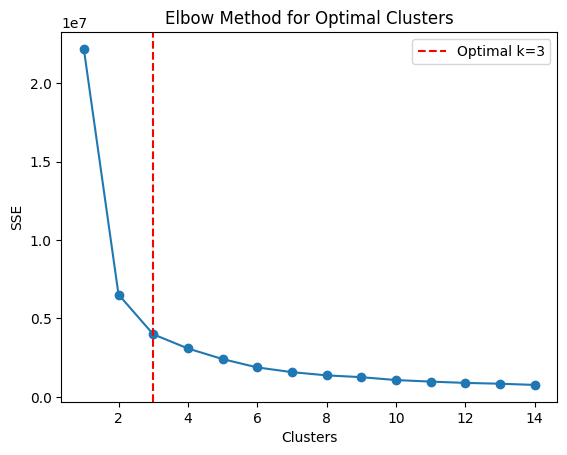

In [ ]:
# elbow method

# df_clustering = df_clustering_standardized

wcss = []
for i in range(1,15):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=random_state_val)
    k_means.fit(df_clustering)
    wcss.append(k_means.inertia_)

#plot elbow curve
plt.title('Elbow Method for Optimal Clusters')
plt.plot(np.arange(1,15),wcss, marker='o')



kneedle = KneeLocator(range(1, 15), wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.knee

print("Optimal number of clusters:", optimal_k)

plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Input number of clusters here, as found in the plot: Please run the code one time.

# (1) (But on y-axis, it is 10^7 !!!): standardizing the features before clustering will help*** --> Not help a lot y-axis, the magnitude is still 10^6.

# (2) Make this as a function for "merge_gas" and "merged_select"

# (3) Include the name of wellhead: Done


k = 7 # Chosen value is 7. But, can change.

# # Initialize K-Means
# TODO: look into random_state *** (42 keep the same number through out the entire code)
kmeans = KMeans(n_clusters=k, random_state=random_state_val)

# Fit the pixel data
kmeans.fit(df_clustering)

# To find how which clusters each value is in

cluster_labels = kmeans.predict(df_clustering)
# print(pixel_df.to_string())

# Add cluster labels as a new column to the DataFrame
df_clustering['Cluster'] = cluster_labels

# Count items in each cluster
counts = df_clustering['Cluster'].value_counts()
print("Counts of items in each cluster:\n", counts)

# Cluster centers
centers = kmeans.cluster_centers_
print("Cluster Centers:\n", centers)

# Verify Data Shape: Ensure the dimensions match between df_clustering and kmeans.cluster_centers_.
# After clustering, the DataFrame will have an additional Cluster column, while the centers correspond only to the features.

print("Shape of df_clustering:", df_clustering.shape)
print("Shape of cluster centers:", centers.shape)

Counts of items in each cluster:
 Cluster
3    93159
0    91076
6    69119
2    11658
4     2911
1     1380
5     1201
Name: count, dtype: int64
Cluster Centers:
 [[5.39969417e+01 4.21298879e+01 1.83671317e-01 3.68392618e+00]
 [3.14118927e+00 2.18585932e+00 1.93815083e+01 7.52897752e+01]
 [5.12095750e+01 3.91977374e+01 8.07372677e-01 8.78331039e+00]
 [5.45739307e+01 4.41097898e+01 6.04633205e-02 1.25578936e+00]
 [4.15788732e+01 3.36095843e+01 3.27279285e+00 2.15385091e+01]
 [2.79116570e+01 1.97043297e+01 9.44229808e+00 4.29417152e+01]
 [5.69936993e+01 4.09339603e+01 8.95267582e-02 2.02769571e+00]]
Shape of df_clustering: (270504, 5)
Shape of cluster centers: (7, 4)


In [ ]:
# Notes for Kopchon

# Using merged_gas or merged_select
# Decide if you want to specify for a single well or do the entire dataframe
# Decide if you want to specify for a specific time period or not
# If either of the above statements, edit the dataframe accordingly

# Then, run isolation_forest function. This will ouput a string array of predicted broken days
# Then, compare with the actual broken days (follow up priority)
# You can find actual broken days by getting the Timestamp for "Yellow" days in merged_gas/merged_select

print(df_clustering.columns)

df_clustering
centers

Index(['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', 'Cluster'], dtype='object')


array([[5.39969417e+01, 4.21298879e+01, 1.83671317e-01, 3.68392618e+00],
       [3.14118927e+00, 2.18585932e+00, 1.93815083e+01, 7.52897752e+01],
       [5.12095750e+01, 3.91977374e+01, 8.07372677e-01, 8.78331039e+00],
       [5.45739307e+01, 4.41097898e+01, 6.04633205e-02, 1.25578936e+00],
       [4.15788732e+01, 3.36095843e+01, 3.27279285e+00, 2.15385091e+01],
       [2.79116570e+01, 1.97043297e+01, 9.44229808e+00, 4.29417152e+01],
       [5.69936993e+01, 4.09339603e+01, 8.95267582e-02, 2.02769571e+00]])

In [ ]:
# Calculate the distance from each point to its assigned cluster center
distances = [np.linalg.norm(i - centers[cluster]) for i, cluster in zip(df_clustering.values[:,:4], cluster_labels)]
distances

# Define a threshold for anomaly detection (e.g., based on the distance percentile)
percentile_threshold = 85 # CHANGE % Depend on desired characteristics


# The percentile_threshold defines the sensitivity of anomaly detection.
# An 85th percentile will flag the top 15% of data points with the largest distances.

threshold_distance = np.percentile(distances, percentile_threshold)

# Identify anomalies
df_clustering['Distance'] = distances
df_clustering['Is_Anomaly'] = df_clustering['Distance'] > threshold_distance

df_clustering['Is_Not_Anomaly'] = df_clustering['Distance'] <= threshold_distance

# Add timestamps from the original dataset
df_clustering['Timestamp (US/Eastern)'] = merged_gas['Timestamp (US/Eastern)']

# Add well from the original dataset
df_clustering['Well'] = merged_gas['Well']

# Display anomalies
anomalies = df_clustering[df_clustering['Is_Anomaly']]
not_anomalies = df_clustering[df_clustering['Is_Not_Anomaly']]

# print("Anomalies detected:")
# print(anomalies[['Well','Timestamp (US/Eastern)', 'Distance']])


# Calculate Recall and Matthews coefficients

merged_gas_yellow = merged_gas[merged_gas["Follow Up Priority"] == "Yellow"]
merged_gas_green = merged_gas[merged_gas["Follow Up Priority"] == "Green"]


true_positive = len(pd.merge(anomalies, merged_gas_yellow, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted yellow + was yellow
true_negative = len(pd.merge(not_anomalies, merged_gas_green, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted green and it actually was green
false_negative = len(pd.merge(not_anomalies, merged_gas_yellow, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted green but was actually yellow
false_positive = len(pd.merge(anomalies, merged_gas_green, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted yellow, but was actually green

recall = true_positive / (true_positive + false_negative)

matthews_corrcoeff = matthews_correlation(true_positive, true_negative, false_negative, false_positive)


print("True positive is equal to", true_positive, "rows")
print("False positive is equal to", false_positive, "rows")
print("True negative is equal to", true_negative, "rows")
print("False negative is equal to", false_negative, "rows")


print("Recall is equal to", recall)
print("Matthews correlation coefficient is equal to", matthews_corrcoeff)



True positive is equal to 15068 rows
False positive is equal to 25500 rows
True negative is equal to 222233 rows
False negative is equal to 7703 rows
Recall is equal to 0.6617188529269685
Matthews correlation coefficient is equal to 0.4345430308912791


In [ ]:
# Make data frame with just a list of broken days

# Add "Well" to Anomaly list
# See how many rows in anomaly dataframe match the rows in merged_gas_yellow based on timestamp + well number
# Divide the result from step 2 by the total length of merged_gas_yellow

# merged_gas_yellow = merged_gas[merged_gas["Follow Up Priority"] == "Yellow"]

# merged_gas_yellow

# TODO: see how many rows in anomaly dataframe match the rows in merged_gas_yellow based on timestamp + well #

# Perform an inner join to find matches based on Timestamp and Well
# matches = pd.merge(
#     anomalies,
#     merged_gas_yellow,
#     on=['Timestamp (US/Eastern)', 'Well'],
#     how='inner'
# )

# # Count the number of matching rows
# num_matches = len(matches)
# print(f"Number of matching rows: {num_matches}")


# # Total number of rows in merged_gas_yellow
# total_yellow = len(merged_gas_yellow)

# # Calculate the proportion
# proportion_matches = num_matches / total_yellow
# print(f"Proportion of matches: {proportion_matches:.2%}")

# # Calculate the accuracy
# accuracy = num_matches / len(anomalies)
# print(f"Accuracy of the model: {accuracy:.2%}")


In [ ]:
# broken_day_real

# # Checking against actual list
# matching_values = intersection(broken_day_real, anomalies_list)

# # len(matching_values)
# print("matching_vales", len(matching_values))
# print("broken_day_real", len(broken_day_real))
# print("anomalies_list", len(anomalies_list))

In [ ]:
df_clustering2 = merged_select.iloc[:, [3, 4, 5, 6, 7, 8, 9, 10]] #CH4, CO2, O2, Balance Gas, LFG Flow, LFG Temperature, Applied Vacuum, Available Vacuum
df_clustering2 = df_clustering2.astype(float)


Optimal number of clusters: 3


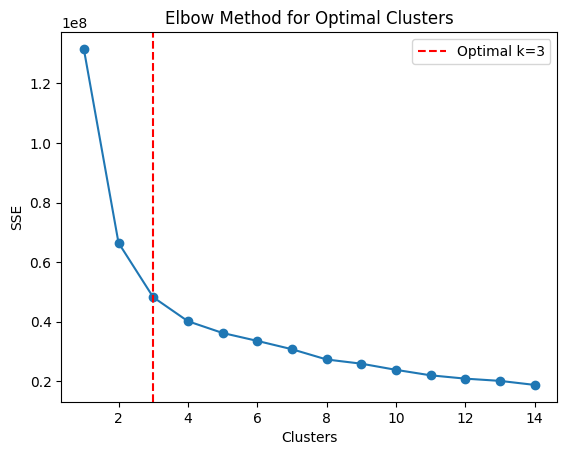

In [ ]:
# elbow method


wcss = []
for i in range(1,15):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=random_state_val)
    k_means.fit(df_clustering2)
    wcss.append(k_means.inertia_)

#plot elbow curve
plt.title('Elbow Method for Optimal Clusters')
plt.plot(np.arange(1,15),wcss, marker='o')



kneedle = KneeLocator(range(1, 15), wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.knee

print("Optimal number of clusters:", optimal_k)

plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.legend()
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Input number of clusters here, as found in the plot: Please run the code one time.


k = 7 # Chosen value is 7. But, can change.

# # Initialize K-Means
# TODO: look into random_state *** (42 keep the same number through out the entire code)
kmeans = KMeans(n_clusters=k, random_state=random_state_val)

# Fit the pixel data
kmeans.fit(df_clustering2)

# To find how which clusters each value is in

cluster_labels = kmeans.predict(df_clustering2)
# print(pixel_df.to_string())

# Add cluster labels as a new column to the DataFrame
df_clustering2['Cluster'] = cluster_labels

# Count items in each cluster
counts = df_clustering2['Cluster'].value_counts()
print("Counts of items in each cluster:\n", counts)

# Cluster centers
centers = kmeans.cluster_centers_
print("Cluster Centers:\n", centers)

# Verify Data Shape: Ensure the dimensions match between df_clustering and kmeans.cluster_centers_.
# After clustering, the DataFrame will have an additional Cluster column, while the centers correspond only to the features.

print("Shape of df_clustering:", df_clustering2.shape)
print("Shape of cluster centers:", centers.shape)

Counts of items in each cluster:
 Cluster
2    28883
0    28435
1    27736
6    21734
5    20238
3    19697
4     6000
Name: count, dtype: int64
Cluster Centers:
 [[ 5.36105853e+01  4.26412867e+01  1.83877659e-01  3.55990156e+00
   7.47972579e+00  8.48285991e+01 -4.86325189e+00 -1.78807558e+01]
 [ 5.45565210e+01  4.33205826e+01  1.13345125e-01  2.00331733e+00
   2.25051114e+01  1.26951189e+02 -7.97391979e+00 -1.98449735e+01]
 [ 5.38682332e+01  4.32431899e+01  1.52581964e-01  2.73053303e+00
   9.94342552e+00  1.04558366e+02 -7.49935191e+00 -2.41899286e+01]
 [ 5.48390781e+01  4.15599269e+01  2.49256307e-01  3.34738312e+00
   5.31472664e+00  8.15576273e+01 -2.21482156e+01 -2.52587238e+01]
 [ 5.41182286e+01  4.17504561e+01  4.22441533e-01  3.70822690e+00
   1.43577044e+01  3.53595953e+01 -5.64604412e+00 -1.33108476e+01]
 [ 5.41046128e+01  4.35346849e+01  1.11867839e-01  2.24233011e+00
   1.48098034e+01  1.06494632e+02 -4.74680956e+00 -9.97411596e+00]
 [ 5.43026443e+01  4.16328535e+01  3.33

In [ ]:
# Calculate the distance from each point to its assigned cluster center
distances2 = [np.linalg.norm(i - centers[cluster]) for i, cluster in zip(df_clustering2.values[:,:8], cluster_labels)]

# Define a threshold for anomaly detection (e.g., based on the distance percentile)
percentile_threshold2 = 85 # CHANGE % Depend on desired characteristics


# The percentile_threshold defines the sensitivity of anomaly detection.
# An 85th percentile will flag the top 15% of data points with the largest distances.

threshold_distance2 = np.percentile(distances2, percentile_threshold2)

# Identify anomalies
df_clustering2['Distance'] = distances2
df_clustering2['Is_Anomaly'] = df_clustering2['Distance'] > threshold_distance2
df_clustering2['Is_Not_Anomaly'] = df_clustering2['Distance'] <= threshold_distance2


# Add timestamps from the original dataset
df_clustering2['Timestamp (US/Eastern)'] = merged_gas['Timestamp (US/Eastern)']

# Add well from the original dataset
df_clustering2['Well'] = merged_gas['Well']

# Display anomalies
anomalies2 = df_clustering2[df_clustering2['Is_Anomaly']]
not_anomalies2 = df_clustering2[df_clustering2['Is_Not_Anomaly']]


# print("Anomalies detected:")
# print(anomalies2[['Well','Timestamp (US/Eastern)', 'Distance']])


# Calculate Recall and Matthews coefficients

merged_select_yellow = merged_select[merged_select["Follow Up Priority"] == "Yellow"]
merged_select_green = merged_select[merged_select["Follow Up Priority"] == "Green"]


true_positive2 = len(pd.merge(anomalies2, merged_select_yellow, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted yellow + was yellow
true_negative2 = len(pd.merge(not_anomalies2, merged_select_green, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted green and it actually was green
false_negative2 = len(pd.merge(not_anomalies2, merged_select_yellow, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted green but was actually yellow
false_positive2 = len(pd.merge(anomalies2, merged_select_green, on=['Timestamp (US/Eastern)', 'Well'], how='inner')) # model predicted yellow, but was actually green

recall2 = true_positive2 / (true_positive2 + false_negative2)

matthews_corrcoeff2 = matthews_correlation(true_positive2, true_negative2, false_negative2, false_positive2)


print("True positive is equal to", true_positive2, "rows")
print("False positive is equal to", false_positive2, "rows")
print("True negative is equal to", true_negative2, "rows")
print("False negative is equal to", false_negative2, "rows")


print("Recall is equal to", recall2)
print("Matthews correlation coefficient is equal to", matthews_corrcoeff2)


True positive is equal to 3248 rows
False positive is equal to 19661 rows
True negative is equal to 121805 rows
False negative is equal to 8009 rows
Recall is equal to 0.2885315803500044
Matthews correlation coefficient is equal to 0.109436805885065


In [ ]:
# # Make data frame with just a list of broken days

# # Add "Well" to Anomaly list
# # See how many rows in anomaly dataframe match the rows in merged_gas_yellow based on timestamp + well number
# # Divide the result from step 2 by the total length of merged_gas_yellow

# merged_select_yellow = merged_select[merged_select["Follow Up Priority"] == "Yellow"]

# merged_select_yellow

# # TODO: see how many rows in anomaly dataframe match the rows in merged_gas_yellow based on timestamp + well #

# # Perform an inner join to find matches based on Timestamp and Well
# matches2 = pd.merge(
#     anomalies2,
#     merged_select_yellow,
#     on=['Timestamp (US/Eastern)', 'Well'],
#     how='inner'
# )

# # Count the number of matching rows
# num_matches2 = len(matches2)
# print(f"Number of matching rows: {num_matches2}")


# # Total number of rows in merged_gas_yellow
# total_yellow2 = len(merged_select_yellow)

# # Calculate the proportion
# proportion_matches2 = num_matches2 / total_yellow2
# print(f"Proportion of matches: {proportion_matches2:.2%}")

# # Calculate the accuracy
# accuracy2 = num_matches2 / len(anomalies2)
# print(f"Accuracy of the model: {accuracy2:.2%}")

# Matthews correlation coefficient (MCC)

In [ ]:
# TO_DO_LIST (KOPCHON)

# (1) Should use df_clustering instead of merged_gas? to check the accuracy/recall of the model?


# # Step 1: Create a binary label for the merged_gas_yellow as the ground truth
# merged_gas['Ground_Truth'] = merged_gas['Timestamp (US/Eastern)'].isin(merged_gas_yellow['Timestamp (US/Eastern)']) & \
#                               merged_gas['Well'].isin(merged_gas_yellow['Well'])

# merged_gas


# # Ground truth binary labels (1 for anomaly, 0 for normal)
# ground_truth = merged_gas['Ground_Truth'].astype(int)

# # Step 2: Create a binary label for the detected anomalies
# df_clustering['Predicted_Anomaly'] = df_clustering['Is_Anomaly'].astype(int)

# # Align the predictions with the original dataset
# merged_gas = merged_gas.merge(df_clustering[['Timestamp (US/Eastern)', 'Well', 'Predicted_Anomaly']],
#                               on=['Timestamp (US/Eastern)', 'Well'], how='left')

# # Fill missing values with 0 (assume no anomaly if no prediction)
# merged_gas['Predicted_Anomaly'].fillna(0, inplace=True)

# # Predictions binary labels
# predicted_labels = merged_gas['Predicted_Anomaly'].astype(int)

# # Step 3: Calculate MCC
# mcc = matthews_corrcoef(ground_truth, predicted_labels)
# print(f"Matthew's Correlation Coefficient (MCC): {mcc:.4f}")

# # Step 4: Additional analysis
# # Match rows in anomaly dataframe with merged_gas_yellow
# anomalies_detected = merged_gas[(merged_gas['Ground_Truth'] == 1) & (merged_gas['Predicted_Anomaly'] == 1)]
# matching_count = len(anomalies_detected)

# # Total length of merged_gas_yellow
# total_ground_truth = len(merged_gas_yellow)

# # Proportion of correctly matched anomalies
# proportion_matched = matching_count / total_ground_truth if total_ground_truth > 0 else 0
# print(f"Proportion of anomalies correctly detected: {proportion_matched:.4%}")


# Local Outlier Factor (LOF)

In [ ]:
lof_df

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

#set up data

desired_well = 'TCGW-064' #TODO: choose a different well
lof_df = merged_select[merged_select['Well'] == desired_well]
desired_features = ['CH4 (%)', 'Applied Vacuum - PA (in. H2O)']
X = lof_df[desired_features]
n_outliers = len(lof_df[lof_df['Follow Up Priority'] == 'Yellow'])
ground_truth = np.ones(len(X), dtype=int) #TODO: Fix this
ground_truth[-n_outliers:] = -1

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_



def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

In [ ]:


# Fit model for novelty detection
# Using fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict, decision_function and score_samples methods).


def lof(df_well_training, df_well_outliers, df_well_observations):
    selected_features = ['CH4 (%)', 'CO2 (%)']

    data_training = df_well_training[selected_features].values
    data_outliers = df_well_outliers[selected_features].values
    data_input = df_well_observations[selected_features].values

    # Fit model for novelty detection
    clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
    clf.fit(data_training)

    y_pred_test = clf.predict(data_input)
    y_pred_outliers = clf.predict(data_outliers)
    n_error_test = y_pred_test[y_pred_test == -1].size
    n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

    # Plotting
    s = 40  # Adjust this value if needed

    plt.figure(figsize=(10, 6))
    b1 = plt.scatter(data_training[:, 0], data_training[:, 1], c="white", s=s, edgecolors="k", label="training observations")
    b2 = plt.scatter(data_input[:, 0], data_input[:, 1], c="blueviolet", s=s, edgecolors="k", label="new regular observations")
    c = plt.scatter(data_outliers[:, 0], data_outliers[:, 1], c="gold", s=s, edgecolors="k", label="new abnormal observations")

    plt.axis("tight")
    plt.xlabel('CH4 (%)')
    plt.ylabel('CO2 (%)')
    plt.legend(
        loc="upper left",
        #prop=matplotlib.font_manager.FontProperties(size=11),
    )

    plt.title("Local Outlier Factor (LOF)")
    plt.show()



# Time to use it!

# choose a well & time period
desired_well = 'TCGW-064' #TODO: choose a different well
startTraining = "2022-09-25"
endTraining = "2023-02-15"

startObs = "2024-01-01"
endObs = "024-06-09"

# merged_select is all NAN data dropped

#merged_gas is all NANs for gas dropped

lof_df = merged_select[merged_select['Well'] == desired_well]

# sort out yellow + greens for a certain amount of days
# start_index, end_index = get_time_period(lof_df, startTraining, endTraining)
mid_index = round(len(lof_df)/2)
df_well_training = lof_df[:mid_index]

df_well_outliers = df_well_training[df_well_training['Follow Up Priority'] == 'Yellow'];
df_well_good = df_well_training[df_well_training['Follow Up Priority'] == 'Green'];

# put in "raw" data for another period
# start_index, end_index = get_time_period(lof_df, startObs, endObs)
df_well_observations = lof_df[mid_index:]

# feed into ML model



#df_well = data_filtering_individual(well_csv)
#start_index, end_index = get_time_period(df_well, start, end)
#df_well_training = df_well[start_index:end_index]
#df_well_outliers = df_well[start_index:end_index]
#df_well_observations = df_well[start_index:end_index]

  # TODO: DATA MANIPULATION
  # Training observations (normal)
  # Novel Observations (normal)
  # Abnormal novel observations (outliers, aka when broken)
  # so take data for half the time

lof(df_well_good, df_well_outliers, df_well_observations )



In [ ]:
merged_select[merged_select['Well']== desired_well]

# k-Nearest Neighbor

# One Class SVM

In [ ]:
merged_gas
merged_select

,level_0,index,Timestamp (US/Eastern),CH4 (%),CO2 (%),O2 (%),Bal. Gas (%),LFG Flow (SCFM),LFG Temperature (F),Applied Vacuum - PA (in. H2O),Available Vacuum - PB (in. H2O),Static Pressure - PS (in. H2O),Valve Position (%),Liquid Column (feet),Well,day,Follow Up Priority
445827,666288,673300,2024-02-24 16:35:40,54.3,44.5,0.0,1.2,24.1,137.5,-5.1,-10.6,NaN,63.1,24.2,TCGW-043,2024-02-24,Green
309841,414137,421149,2024-01-07 22:50:49,54.7,42.8,0.0,2.5,7.3,55.5,-11.2,-16.4,NaN,51.0,29.8,TCGW-069,2024-01-07,Green
587128,902564,909576,2024-01-30 08:13:19,54.5,42.4,0.0,3.0,0.0,46.4,-9.9,-7.2,NaN,28.6,<17,TCGW-023,2024-01-30,Green
670067,1056853,1063865,2024-04-13 04:33:30,55.4,42.7,0.1,1.8,4.5,95.8,-1.2,-27.4,NaN,21.2,<11,TCGW-011,2024-04-13,Green
425851,632060,639072,2024-08-10 04:17:23,52.0,45.2,0.1,2.7,25.0,132.3,-26.7,-26.2,NaN,72.9,<11,TCGW-047,2024-08-10,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265791,359598,366610,2024-05-10 16:04:09,55.4,44.0,0.0,0.6,9.9,96.0,-2.4,-19.4,NaN,21.7,<12,TCGW-109,2024-05-10,Green
611087,946963,953975,2024-06-16 04:35:07,53.5,43.4,0.1,3.0,20.5,95.9,-9.9,-21.9,NaN,41.2,<10,TCGW-021,2024-06-16,Green
250101,341765,348777,2024-05-20 01:54:22,55.2,43.1,0.1,1.6,21.6,111.2,-3.8,-20.0,NaN,28.2,<11,TCGW-112,2024-05-20,Green
727841,1164427,1171439,2024-01-02 19:43:49,54.5,43.4,0.2,1.9,8.5,68.2,-7.5,-5.5,NaN,74.5,<11,TCGW-002,2024-01-02,Green


In [ ]:
# Split the data into features (X) and target variable (y)
merged_select

# NOTABLY Excluding Liquid Column
merged_select_svm = merged_select[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', 'LFG Temperature (F)', 'LFG Flow (SCFM)', 'Applied Vacuum - PA (in. H2O)', 'Available Vacuum - PB (in. H2O)', 'Follow Up Priority']]
# merged_select_svm = merged_select[['LFG Flow (SCFM)', 'LFG Temperature (F)', 'Applied Vacuum - PA (in. H2O)', 'Available Vacuum - PB (in. H2O)', 'Follow Up Priority']]
X = merged_select_svm.drop(columns='Follow Up Priority')  # Features
y = merged_select_svm['Follow Up Priority']  # Target
# y = [y == 'Green']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_val)

In [ ]:
# # Split the data into features (X) and target variable (y)
# merged_gas

# # NOTABLY Excluding Liquid Column
# merged_gas_svm = merged_gas[['CH4 (%)', 'CO2 (%)', 'O2 (%)', 'Bal. Gas (%)', 'Follow Up Priority']]
# X = merged_gas_svm.drop(columns='Follow Up Priority')  # Features
# y = merged_gas_svm['Follow Up Priority']  # Target
# # y = [y == 'Green']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_val)

In [ ]:

# Create an SVM classifier
clf = SVC(kernel='linear')

In [ ]:

# Fit the model to the training data
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:

# Make prffedictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9573088885251269


In [ ]:

recall = recall_score(y_test, y_pred, average='macro')
print("recall is", recall)
mcc = matthews_corrcoef(y_test, y_pred)
print("matthews is", mcc)


recall is 0.7459137132306655
matthews is 0.6458015895767928


In [ ]:
len(merged_select)

152723